# 3.2 Aufgaben

In [5]:
dur = 1.5  # duration in seconds
amp = 0.3  # amplitude (full scale: +-1.0)
freq = 440.0  # frequency in Hertz
samplerate = 44100  # sampling frequency / sampling rate  in Hertz

## Impuls

### Benötigte Packages

In [ ]:
import numpy as np # for faster operations with floating point numbers
from scipy import signal  # signal processing
import soundfile as sf  # for writing/reading soundfiles
from IPython.display import Audio # audio player
from IPython.core.display import display # enable visual integration of audio player
import matplotlib.pyplot as plt # plotting visuals

### Erzeugung des Impulssignals

In [ ]:
impulse_signal = signal.unit_impulse(100, "mid") # create impulse-signal with 100 samples and the impulse positioned in the middle

### Das digitale Signal (numerisches Array)
Wir können uns das digitale Signal, so wie es vom Computer repräsentiert wird, auch ansehen - als numerisches Array.  Damit können wir bestätigen, dass das Signal exakt aus den definierten 100 Samples im normalisierten Wertebereich [0.,1.] besteht, und der eigentliche Impuls (dargestellt durch die 1.) mittig positioniert ist. 

In [ ]:
print(impulse_signal) # show impulse-signal as created in its numeric representation

### Plotten des Impulssignals
Für eine etwas intuitivere Darstellung können wir unseren Impuls auch wieder plotten und damit für die weitere Analyse etwas greifbarer machen.

In [ ]:
plt.plot(np.arange(-50, 50), impulse_signal) # plot the signal with plt.plot(x-axis, y-axis)
plt.xlabel("Time [samples]")
plt.ylabel("Amplitude")
plt.legend(['Impulse'])
plt.grid(True)
plt.show()

### Anhören des erzeugten Signals
Natürlich können wir auch direkt noch testen, wie sich unser rohes Audiosignal anhört.

In [ ]:
display(Audio(impulse_signal, rate=samplerate))

Da wir nur eine kurze "Spitze", also einen einzigen Impuls erzeugt haben, ist das Ergebnis hörbar - wie sichtbar - genau das, was wir erwartet haben: Ein kurzes, impulsives Klicken.

### Filtern des erzeugten Signals
Zu Testzwecken wollen wir jetzt unser erzeugtes Signal noch filtern. Dafür nehmen wir einen Butterworth-Filter 4ter Ordnung und verwenden das Ergebnis als seperates Audiosignal und geben dieses mit dem Audioplayer zum Anhören aus.

In [ ]:
b, a = signal.butter(4, 0.2) # create butterworth-filter
response = signal.lfilter(b, a, impulse_signal) # use butterworth-filter on the signal
display(Audio(response, rate=samplerate))

### Plots beider Signale
Das gefilterte Resultat können wir anschliessend gegen unser originales Impulssignal plotten.

In [ ]:
plt.plot(np.arange(-50, 50), impulse_signal)
plt.plot(np.arange(-50, 50), response)
plt.legend(['Original Impulse', 'Filtered Impulse'])
plt.xlabel("Time [samples]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

### Impuls - Zusammenfassung
Nochmal alle Einzelschritte zur Erzeugung, Anzeige und Filterung des Impulssignals zusammengefasst und in einer Zelle ausgeführt:

In [ ]:
import numpy as np # for faster operations with floating point numbers
from scipy import signal  # signal processing
import soundfile as sf  # for writing/reading soundfiles
from IPython.display import Audio # audio player
from IPython.core.display import display # enable visual integration of audio player
import matplotlib.pyplot as plt # plotting visuals

print("\n") # line break for better readability

impulse_signal = signal.unit_impulse(100, "mid") # create impulse-signal with 100 samples and the impulse positioned in the middle
print("Original Impulse: \n", impulse_signal, "\n") # show impulse-signal in its numeric representation 

b, a = signal.butter(4, 0.2) # create butterworth-filter
response = signal.lfilter(b, a, impulse_signal) # use butterworth-filter on the signal

np.set_printoptions(suppress="True") # suppress scientific notation of floating point numbers
print("Filtered Impulse: \n",response, "\n") # show impulse-signal in its numeric representation 

plt.plot(np.arange(-50, 50), impulse_signal) # plot the original impulse signal
plt.plot(np.arange(-50, 50), response) # plot the filtered impulse signal
plt.legend(['Original Impulse', 'Filtered Impulse'])
plt.grid(True) # turn on grid 
plt.xlabel("Time [samples]") # title of the x-axis
plt.ylabel("Amplitude") # title of the y-axis
plt.show() # show the plot

print("\n") # line break for better readability
print("Original Impulse\n")
display(Audio(impulse_signal, rate=samplerate))
print("Filtered Impulse\n")
display(Audio(response, rate=samplerate))

## Sinuswelle

### Benötigte Packages

In [6]:
import numpy as np # for faster operations with floating point numbers
from scipy import signal  # signal processing
import soundfile as sf  # for writing/reading soundfiles
from IPython.display import Audio # audio player
from IPython.core.display import display # enable visual integration of audio player
import matplotlib.pyplot as plt # plotting visuals

### Erzeugung des Sinussignals

In [7]:
impulse_signal = signal.unit_impulse(100, "mid") # create impulse-signal with 100 samples and the impulse positioned in the middle

### Das digitale Signal (numerisches Array)
Wir können uns das digitale Signal, so wie es vom Computer repräsentiert wird, auch ansehen - als numerisches Array.  Damit können wir bestätigen, dass das Signal exakt aus den definierten 100 Samples im normalisierten Wertebereich [0.,1.] besteht, und der eigentliche Impuls (dargestellt durch die 1.) mittig positioniert ist.

In [8]:
print(impulse_signal) # show impulse-signal as created in its numeric representation

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


### Plotten des Sinussignals
Für eine etwas intuitivere Darstellung können wir unseren Impuls auch wieder plotten und damit für die weitere Analyse etwas greifbarer machen.

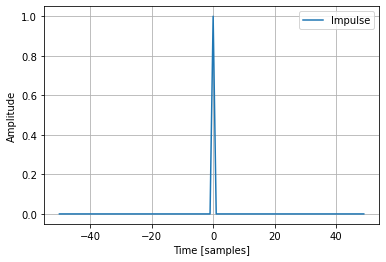

In [9]:
plt.plot(np.arange(-50, 50), impulse_signal) # plot the signal with plt.plot(x-axis, y-axis)
plt.xlabel("Time [samples]")
plt.ylabel("Amplitude")
plt.legend(['Impulse'])
plt.grid(True)
plt.show()

### Anhören des erzeugten Signals
Natürlich können wir auch direkt noch testen, wie sich unser rohes Audiosignal anhört.

In [11]:
display(Audio(impulse_signal, rate=samplerate))

Da wir nur eine kurze "Spitze", also einen einzigen Impuls erzeugt haben, ist das Ergebnis hörbar - wie sichtbar - genau das, was wir erwartet haben: Ein kurzes, impulsives Klicken.

### Filtern des erzeugten Signals
Zu Testzwecken wollen wir jetzt unser erzeugtes Signal noch filtern. Dafür nehmen wir einen Butterworth-Filter 4ter Ordnung und verwenden das Ergebnis als seperates Audiosignal und geben dieses mit dem Audioplayer zum Anhören aus.

In [13]:
b, a = signal.butter(4, 0.2) # create butterworth-filter
response = signal.lfilter(b, a, impulse_signal) # use butterworth-filter on the signal
display(Audio(response, rate=samplerate))

### Plots beider Signale
Das gefilterte Resultat können wir anschliessend gegen unser originales Impulssignal plotten.

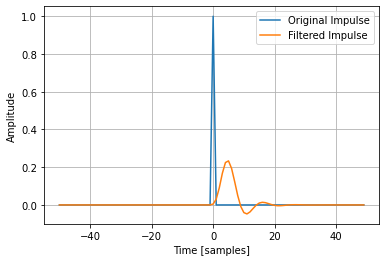

In [14]:
plt.plot(np.arange(-50, 50), impulse_signal)
plt.plot(np.arange(-50, 50), response)
plt.legend(['Original Impulse', 'Filtered Impulse'])
plt.xlabel("Time [samples]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

### Impuls - Zusammenfassung
Nochmal alle Einzelschritte zur Erzeugung, Anzeige und Filterung des Impulssignals zusammengefasst und in einer Zelle ausgeführt:



Original Impulse: 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.] 

Filtered Impulse: 
 [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.00482434  0.03072872  0.09059468  0.16794482
  0.22464127  0.23345719  0.19351255  0.12376524  0.04960

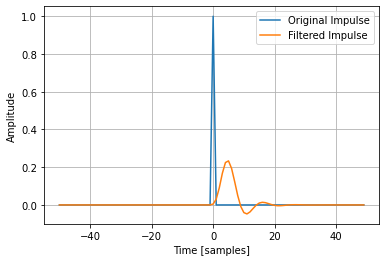



Original Impulse



Filtered Impulse



In [15]:
import numpy as np # for faster operations with floating point numbers
from scipy import signal  # signal processing
import soundfile as sf  # for writing/reading soundfiles
from IPython.display import Audio # audio player
from IPython.core.display import display # enable visual integration of audio player
import matplotlib.pyplot as plt # plotting visuals

print("\n") # line break for better readability

impulse_signal = signal.unit_impulse(100, "mid") # create impulse-signal with 100 samples and the impulse positioned in the middle
print("Original Impulse: \n", impulse_signal, "\n") # show impulse-signal in its numeric representation

b, a = signal.butter(4, 0.2) # create butterworth-filter
response = signal.lfilter(b, a, impulse_signal) # use butterworth-filter on the signal

np.set_printoptions(suppress="True") # suppress scientific notation of floating point numbers
print("Filtered Impulse: \n",response, "\n") # show impulse-signal in its numeric representation

plt.plot(np.arange(-50, 50), impulse_signal) # plot the original impulse signal
plt.plot(np.arange(-50, 50), response) # plot the filtered impulse signal
plt.legend(['Original Impulse', 'Filtered Impulse'])
plt.grid(True) # turn on grid
plt.xlabel("Time [samples]") # title of the x-axis
plt.ylabel("Amplitude") # title of the y-axis
plt.show() # show the plot

print("\n") # line break for better readability
print("Original Impulse\n")
display(Audio(impulse_signal, rate=samplerate))
print("Filtered Impulse\n")
display(Audio(response, rate=samplerate))